In [2]:
if get_ipython().Completer.use_jedi==True:
	get_ipython().Completer.use_jedi=False
else:
	get_ipython().Completer.use_jedi=True

In [18]:
%%javascript

IPython.keyboard_manager.edit_shortcuts.add_shortcut('ctrl-enter', {
	help : "run cell and keep focus", //This is optional
	handler : function (event) {
		IPython.notebook.execute_cell();
		IPython.notebook.edit_mode();
		return false;
	}}
);

IPython.keyboard_manager.edit_shortcuts.add_shortcut('ctrl-x', {
	help : "jedi", //This is optional
	handler : function (event) {
		var index=IPython.notebook.get_edit_index();
		IPython.notebook.execute_cells([0]);
		IPython.notebook.get_cell(index).focus_cell();
		IPython.notebook.edit_mode();
		return false;
	}}
);


<IPython.core.display.Javascript object>

In [3]:
%config IPCompleter.greedy=True
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity='all'
get_ipython().Completer.use_jedi = False

# 方程式求解

In [4]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import Eq , solve_linear_system,Matrix
from sympy.solvers.solveset import linsolve
from numpy import linalg
import numpy as np
import sympy as sp

In [5]:
x,y=sp.symbols('x y')
# just for display
eq1=Eq(2*x-y,-4)
eq2=Eq(3*x-y,-2)
display(eq1)
display(eq2)
# ----------------
row1=(2,-1,-4)
row2=(3,-1,-2)
system=Matrix((row1,row2))
solve_linear_system(system,x,y)

In [90]:
linsolve([2*x-y+4,
          3*x-y+2],
         x,y)

In [109]:
import sympy as sp
x, y = sp.symbols('x, y')
eq1 = sp.Eq(2*x -y , -4)             
eq2 = sp.Eq(3*x -y, -2)         
ans = sp.solve((eq1, eq2), (x, y))
display(eq1)
display(eq2)
display(ans)

In [89]:
A=[[2,1],[3,1]]
s=[-4,-2]
r=np.linalg.solve(A,s)
r

array([ 2., -8.])

# Solver
来源 http://apmonitor.com/che263/index.php/Main/PythonOptimization

In [2]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq

# initial guesses
n = 4
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0
x0[2] = 5.0
x0[3] = 1.0

# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1} 
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))

Initial Objective: 16.0
Final Objective: 17.01401724563517
Solution
x1 = 1.0
x2 = 4.742996096883977
x3 = 3.8211546234095715
x4 = 1.379407645075325


# 解非线性方程组-nonlinsolve（）

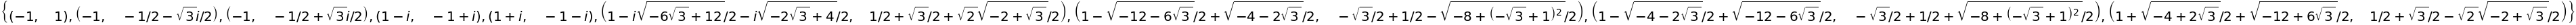

In [7]:
"""
    x**2+y**2-2=0
    x**3+y**3=0
"""

import sympy as sy
x, y = sy.symbols("x y")

eq = [x**2+y**3-2, x**3+y**3]
result = sy.nonlinsolve(eq, [x, y])
display(result)

In [10]:
import sympy as sy
x, y = sy.symbols("x y z")

eq = [x**2+y**2-z**2, x**3+y**3]
result = sy.nonlinsolve(eq, [x, y])
display(result)

In [9]:
from sympy import *


# 初始化
x = symbols('x')

# 表达式
expr1 = sin(x)/x
expr2 = 1/x
display(expr1)

# 求趋于某个值的极限
r1 = limit(expr1, x, 0)

# 正向趋进
r2 = limit(expr2, x, 0, '+')

# 负向趋进
r3 = limit(expr2, x, 0, '-')

display(r1)
display(r2)
display(r3)

In [2]:
from sympy import *

# 初始化
x = symbols('x')

# 表达式
expr1 = cos(x)

expr2 = exp(x**2)


# 求导
r1 = diff(expr1, x)
r2 = diff(expr2, x)


print("r1:", r1)
print("r2:", r2)

r1: -sin(x)
r2: 2*x*exp(x**2)


In [12]:

# 初始化
x, y = symbols('x y')

# 表达式
expr1 = cos(x)
expr2 = exp(-x)
expr3 = exp(-x**2-y**2)
expr4=1/3*x**3

# 求不定积分
r1 = integrate(expr1, x)

# 求定积分
r2 = integrate(expr2, (x, 0, oo))

# 求多重积分
r3 = integrate(expr3, (x, -oo, oo), (y, -oo, oo))

r4=integrate(expr4,(x,0,1))

display(r1)
display(r2)
display(r3)
display(r4)

In [14]:
from time import time
from numpy import uint8
from numpy.random import rand
import cv2

xy=(512,512)
Nf = 500

def fpsopencv(dat):
    tic = time()
    for i in dat:
        cv2.imshow('test',i)
        cv2.waitKey(1) #integer milliseconds, 0 makes wait forever
    cv2.destroyAllWindows()
    return Nf / (time()-tic)


imgs = (rand(Nf,xy[0],xy[1])*255).astype(uint8)
fps = fpsopencv(imgs)

print(fps,'fps')

178.303810051593 fps


# 毛春

In [51]:
square=100
circle=np.pi*5**2
circular_sector=np.pi*100/4
irregular=square-circular_sector
corner=(square-circle)/4
fusiform=square-irregular*2
crescent=irregular-corner

In [69]:
corner*4+circle

In [78]:
x,y,m,n=sp.symbols('x y m n')
row1=(2,1,0,0,corner)
row2=(2,0,1,0,crescent) #pointless
row3=(0,2,0,1,fusiform)
row4=(0,0,2,1,circle)
row5=(8,4,2,1,square) #pointlless
row6=(2,2,1,1,circular_sector-corner)
system=Matrix((row1,row3,row4,row6))
result=solve_linear_system(system,x,y,m,n)
display(result)

None

In [96]:
x,y,m,n=sp.symbols('x y m n')
linsolve([2*x+y-corner
          ,2*y+n-fusiform
          ,2*m+n-circle
#           ,2*x+2*y+m+n+corner-circular_sector
         ],
         x,y,m,n)

In [104]:
k=sp.symbols('k')
linsolve([2*(0.25*k-12)+2*(-0.5*k+29)+1*(-0.5*k+39)+k-73],k)
    

In [105]:
0.5-1-0.5+1

In [77]:
A=[[2,1,0,0,],
  [0,2,0,1],
  [0,0,2,1],
  [2,2,1,1]] 
s=[corner,fusiform,circle,circular_sector-corner]
r=np.linalg.solve(A,s)
r

LinAlgError: Singular matrix

In [54]:
x,y=sp.symbols('x y')
row1=(2,-1,-4)
row2=(3,-1,-2)
# row3=(1,1,10)
system=Matrix((row1,row2))
solve_linear_system(system,x,y)

In [38]:
5.4*4+circle

In [47]:
crescent

# 优化

In [1]:
import scipy.optimize as opt

t=opt.fmin(np.sin,  # Objective function to be minimized.
              x0=0,  # Initial guess.
              maxiter=2000,  # Maximum number of iterations to perform.
              full_output=True)  # Return fopt, func_calls, grad_calls, and warnflag in addition to xopt.

#display(t)
xopt=t[0]
fopt=t[1]
display(xopt)
display(fopt)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 26
         Function evaluations: 52


array([-1.5708125])

-0.9999999998692137

# 符号运算

In [6]:
x,y,z,t=sp.symbols('x,y,z,t')
f=x**2+2*x+1
display(f)
g=sp.diff(f,x)
display(g)
g1=sp.integrate(g,x)
display(g1)

In [25]:
r=sp.solve(3*x+1-y,[x])
f=r[0]
f.factor()

In [47]:
i,n=sp.symbols('i,n')
sum=sp.summation(3**i,(i,0,n-1))
sp.factor(sum)

In [90]:
f=sp.Function('f')(x)
f1=sp.Derivative(f,x)
sp.dsolve(f1-3*x**2)

In [147]:
g,t=sp.symbols('g,t')
v=sp.Function('v')(t)
#g=sp.Dummy('g')
v=g*t
v.integrate(t)

In [41]:
f.subs?

# covid19

In [129]:
from IPython.core.debugger import set_trace
from IPython.core.debugger import Pdb as CorePdb
import sys

def breakpoint(condition=True):
    """
    Set a breakpoint at the location the function is called if `condition == True`.
    """
    if condition:
        debugger = CorePdb()
        frame = sys._getframe()
        debugger.set_trace(frame.f_back)
        return debugger

In [140]:
class Model:
    def __init__(self,r0,total):
        self.r0=r0
        self.total=total
        self.infected=1
        self.immunity=0
    def printMe(self):
        print(f'the infected number is {self.infected}')
        print(f'the immunity number is {self.immunity}')
        print(f'the suscepteble number is {self.total-self.infected-self.immunity}')
        print('----------------------------')
    def move_a_period(self):
        #set_trace()
        immunity_rate=(self.immunity+self.infected)/self.total
        r1=self.r0*(1-immunity_rate)
        if r1<=1:
            print('herd immunity is reached')
        self.immunity=self.immunity+self.infected
        self.infected=self.infected*r1
        if self.infected>self.total-self.immunity:
            self.infected=self.total-self.immunity

model=Model(3,10000)
for i in range(1,20):
    model.move_a_period()
    #breakpoint(i==4)
    model.printMe()

the infected number is 2.9997
the immunity number is 1
the suscepteble number is 9996.0003
----------------------------
the infected number is 8.995500629973
the immunity number is 3.9997
the suscepteble number is 9987.004799370026
----------------------------
the infected number is 26.95143238928294
the immunity number is 12.995200629972999
the suscepteble number is 9960.053366980743
----------------------------
the infected number is 80.53131147414942
the immunity number is 39.94663301925594
the suscepteble number is 9879.522055506595
----------------------------
the infected number is 238.68326036031914
the immunity number is 120.47794449340536
the suscepteble number is 9640.838795146276
----------------------------
the infected number is 690.3320508701291
the immunity number is 359.1612048537245
the suscepteble number is 8950.506744276146
----------------------------
the infected number is 1853.6465031309226
the immunity number is 1049.4932557238535
the suscepteble number is 7096.8

# pandas

In [70]:
import pandas as pd

class A:
    def __init__(self,a,b,c):
        self.a=a
        self.b=b
        self.c=c
        

a=A(1,2,3)
b=A(4,5,6)
df=pd.DataFrame()
df=df.append([a.__dict__])
df=df.append([b.__dict__])
df

,a,b,c
0,1,2,3
0,4,5,6


In [71]:
df

,a,b,c
0,1,2,3
0,4,5,6
